# 1. Data Overview

In [1]:
pip install --upgrade numpy scipy seaborn matplotlib pandas



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('Churn.csv')

In [4]:
# Display the first few rows
print("Dataset Overview:")
print(df.head())

Dataset Overview:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63      

In [5]:
# Dataset information
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Drop unnecessary columns (CustomerId, Surname, and RowNumber)
df.drop(['CustomerId', 'Surname', 'RowNumber'], axis=1, inplace=True)
print("\nColumns after removing unique identifiers:")
print(df.columns)



Columns after removing unique identifiers:
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


## Univariate analysis

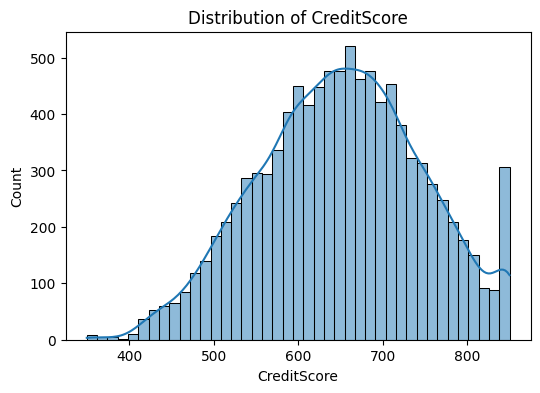

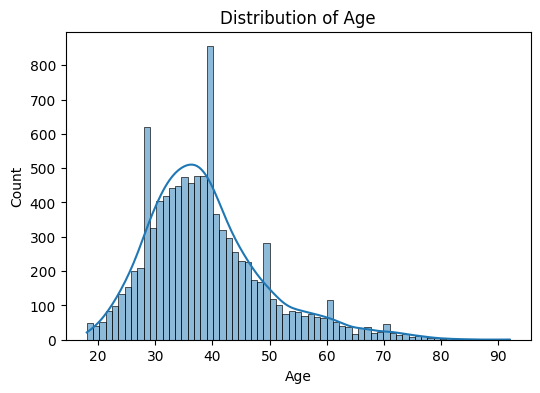

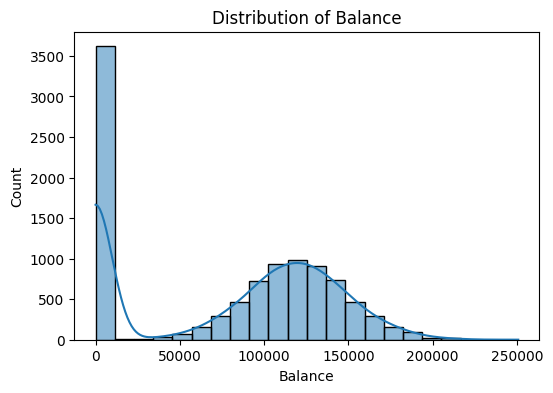

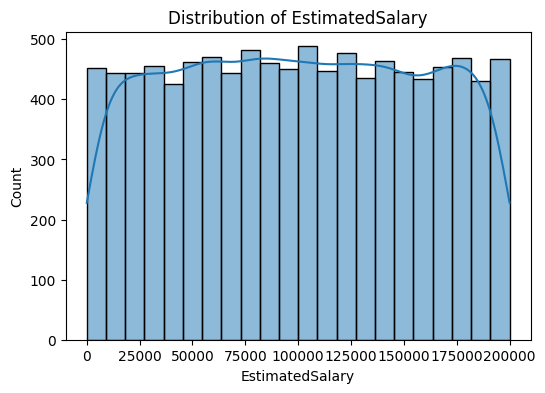

In [7]:
# Visualize numerical features
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## Bivariate analysis


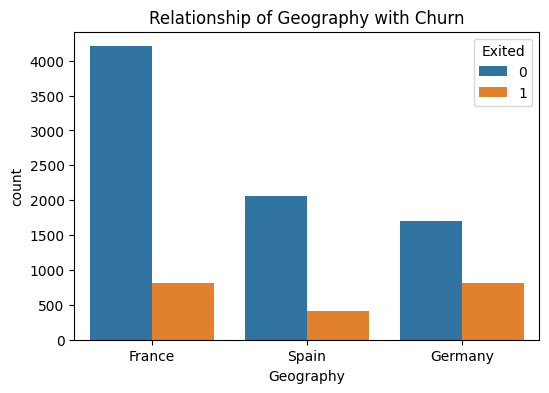

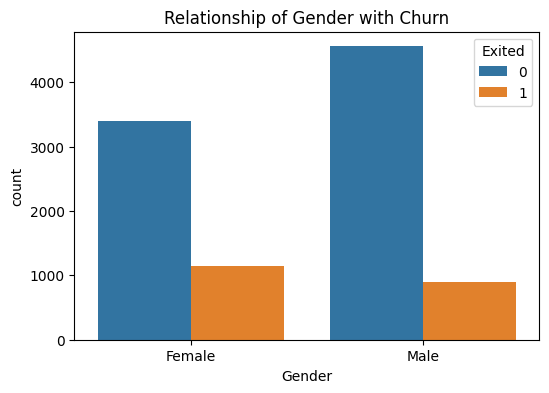

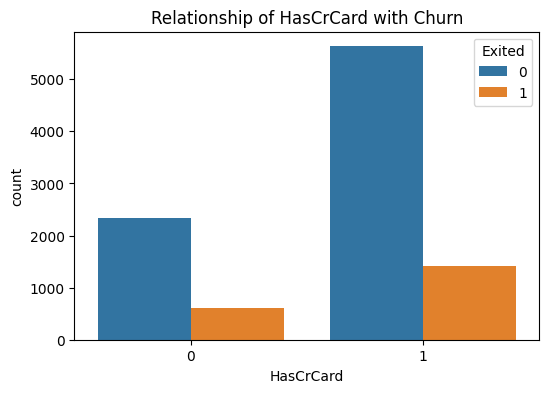

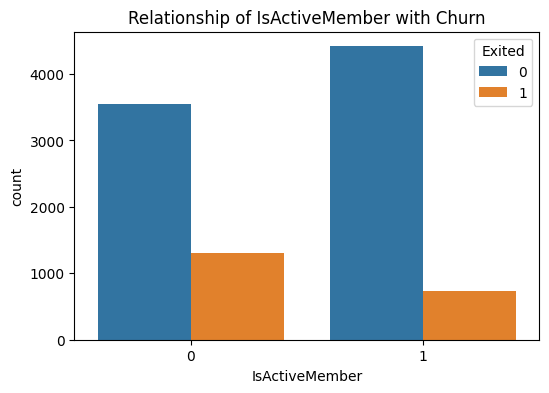

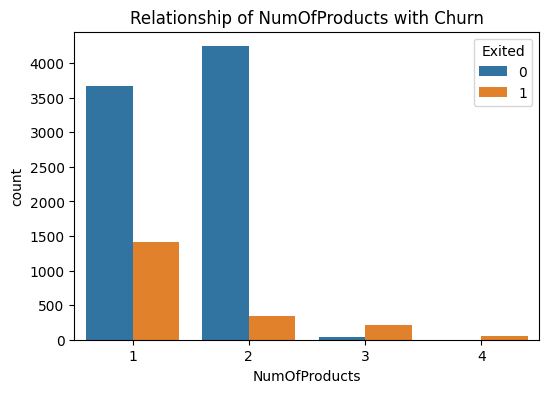

In [8]:
# Visualize relationship of categorical features with target variable
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Exited')
    plt.title(f'Relationship of {col} with Churn')  # Fixed the quotation marks here
    plt.show()


# Observations and Insights from EDA
	1.	High churn observed among older customers.
	2.	Customers with low credit scores have higher churn rates.
	3.	Churn varies by Geography and Gender.

# 2. Data Preprocessing

## Split the Target Variable and Predictors

In [9]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])


In [10]:
# Splitting predictors and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

## Split the Data into Train and Test Sets

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalize the Data

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Model Building

## Neural Network Model with SGD Optimizer

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [20]:
# Build the model
model_sgd = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [18]:
# Compile the model
model_sgd.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Train the model
history_sgd = model_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.5386 - loss: 0.7086 - val_accuracy: 0.8035 - val_loss: 0.4872
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.8008 - loss: 0.4801 - val_accuracy: 0.8050 - val_loss: 0.4546
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8040 - loss: 0.4533 - val_accuracy: 0.8085 - val_loss: 0.4356
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.8152 - loss: 0.4314 - val_accuracy: 0.8150 - val_loss: 0.4232
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.8128 - loss: 0.4295 - val_accuracy: 0.8200 - val_loss: 0.4134
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.8155 - loss: 0.4275 - val_accuracy: 0.8245 - val_loss: 0.4059
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.8241 - loss: 0.4205 - val_accuracy: 0.8275 - val_loss: 0.3992
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.8249 - loss: 0.4118 - va

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.8684 - loss: 0.3321 - val_accuracy: 0.8605 - val_loss: 0.3486


## Model Performace

In [22]:
from sklearn.metrics import classification_report

In [23]:
y_pred_sgd = (model_sgd.predict(X_test) > 0.5).astype("int32")
print("SGD Model Performance:")
print(classification_report(y_test, y_pred_sgd))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step
SGD Model Performance:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1607
           1       0.20      0.25      0.22       393

    accuracy                           0.66      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.69      0.66      0.67      2000



# 4. Model Performance Improvement and Final Model Selection

## Model with Adam Optimizer

In [24]:
from tensorflow.keras.optimizers import Adam

In [27]:
model_adam = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [26]:
model_adam.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.8064 - loss: 0.4885 - val_accuracy: 0.8170 - val_loss: 0.4174
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.8254 - loss: 0.4103 - val_accuracy: 0.8420 - val_loss: 0.3827
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.8430 - loss: 0.3926 - val_accuracy: 0.8540 - val_loss: 0.3630
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.8573 - loss: 0.3559 - val_accuracy: 0.8585 - val_loss: 0.3541
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.8545 - loss: 0.3549 - val_accuracy: 0.8580 - val_loss: 0.3527
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.8471 - loss: 0.3612 - val_accuracy: 0.8575 - val_loss: 0.3496
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.8554 - loss: 0.3473 - val_accuracy: 0.8585 - val_loss: 0.3516
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.8608 - loss: 0.3344 - 

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.8708 - loss: 0.3037 - val_accuracy: 0.8625 - val_loss: 0.3410


## Model with Adam Optimizer and Dropout

In [29]:
from tensorflow.keras.layers import Dropout

In [30]:
model_dropout = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [31]:
model_dropout.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.6397 - loss: 0.6391 - val_accuracy: 0.8075 - val_loss: 0.4374
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.7885 - loss: 0.4807 - val_accuracy: 0.8145 - val_loss: 0.4204
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.8045 - loss: 0.4555 - val_accuracy: 0.8305 - val_loss: 0.4095
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.8071 - loss: 0.4494 - val_accuracy: 0.8345 - val_loss: 0.3997
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.8189 - loss: 0.4281 - val_accuracy: 0.8415 - val_loss: 0.3870
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.8239 - loss: 0.4211 - val_accuracy: 0.8515 - val_loss: 0.3757
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.8279 - loss: 0.4189 - val_accuracy: 0.8550 - val_loss: 0.3653
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.8297 - loss: 0.4011 - 

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.8603 - loss: 0.3407 - val_accuracy: 0.8625 - val_loss: 0.3392


## Model with SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
# Balancing the data using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [36]:
model_smote = Sequential([
    Dense(32, input_dim=X_train_balanced.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [35]:
model_smote.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history_smote = model_smote.fit(X_train_balanced, y_train_balanced, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - accuracy: 0.5768 - loss: 0.6824 - val_accuracy: 0.6775 - val_loss: 0.5944
Epoch 2/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.7048 - loss: 0.5823 - val_accuracy: 0.6945 - val_loss: 0.5577
Epoch 3/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.7225 - loss: 0.5541 - val_accuracy: 0.7330 - val_loss: 0.5091
Epoch 4/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.7295 - loss: 0.5450 - val_accuracy: 0.7325 - val_loss: 0.5039
Epoch 5/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.7431 - loss: 0.5213 - val_accuracy: 0.7360 - val_loss: 0.4959
Epoch 6/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.7509 - loss: 0.5065 - val_accuracy: 0.7280 - val_loss: 0.5009
Epoch 7/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.7563 - loss: 0.4970 - val_accuracy: 0.7305 - val_loss: 0.5073
Epoch 8/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.7538 - loss: 0.4961 - 

398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.7972 - loss: 0.4383 - val_accuracy: 0.7790 - val_loss: 0.4537


## Compare and Comment on Model Performance

In [37]:
from sklearn.metrics import roc_auc_score

In [41]:
print("ROC AUC Scores:")
print(f"SGD Model: {roc_auc_score(y_test, y_pred_sgd)}")
print(f"Adam Model: {roc_auc_score(y_test, model_adam.predict(X_test))}")
print(f"Dropout Model: {roc_auc_score(y_test, model_dropout.predict(X_test))}")
print(f"SMOTE Model: {roc_auc_score(y_test, model_smote.predict(X_test))}")

ROC AUC Scores:
SGD Model: 0.5030266755970618
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
Adam Model: 0.5307568193225884
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
Dropout Model: 0.8556379453124133
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
SMOTE Model: 0.5009856686158363


# 5. Actionable Insights & Recommendations
	1.	Target older customers with low credit scores for retention campaigns.
	2.	Introduce location-specific offers, as churn rates vary by geography.
	3.	Encourage inactive members to use more banking services to reduce churn.